In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
sns.set_style('white')
import seaborn as sns
import time
from pickle import load

import math
import os
from matplotlib.ticker import MultipleLocator
import matplotlib

In [2]:
k = 8
J = 32

# Load data #

## Non climate change data ##

In [3]:
truth_set_f_20 = np.load("../../data/truth_run/f_20_all.npy")

polynomial_data_f_20 = np.load("../../data/simulation_runs/polynomial_param/f_20_all.npy")

rnn_full_f_20 = np.load("../../data/simulation_runs/rnn/rnn_final/f_20_data/f_20_all.npy")


gan_full_f_20 = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/f_20_all.npy")

## Climate change ##

In [4]:
truth_set_full = np.load("../../data/truth_run/climate_change_exp/f_23_all.npy")

In [5]:

polynomial_data = np.load("../../data/simulation_runs/polynomial_param/climate_change/f_23_all.npy")

In [6]:

gan_full_f_23 = np.load("../../data/simulation_runs/gan_gagne/corrected_gans/climate_change_exp2/f_23_all.npy")

In [7]:

rnn_full_23 =np.load("../../data/simulation_runs/rnn/rnn_final/clim_change/f_23_all.npy")

# Recreating plots from Hannah paper #

In [8]:
#PCA / EOF analysis
from sklearn.decomposition import PCA

In [9]:
#smoothing data temporally
from scipy.ndimage import uniform_filter1d

In [10]:
smoothed_data = uniform_filter1d(truth_set_full,size=80,axis=0)

In [11]:
smoothed_data_f_20 = uniform_filter1d(truth_set_f_20,size=80,axis=0)

In [12]:
pca_smooth = PCA(n_components=4)

In [13]:
pca_data_smooth_f_20 = pca_smooth.fit_transform(smoothed_data_f_20) #get the original pca components

In [14]:
pca_data_smooth_f_23 = pca_smooth.transform(smoothed_data) #for the f 23 test data

In [15]:
dim1 = (pca_data_smooth_f_23[:,0]**2 + pca_data_smooth_f_23[:,1]**2)**0.5
dim2 = (pca_data_smooth_f_23[:,2]**2 + pca_data_smooth_f_23[:,3]**2)**0.5

dim1_f20 = (pca_data_smooth_f_20[:,0]**2 + pca_data_smooth_f_20[:,1]**2)**0.5
dim2_f20 = (pca_data_smooth_f_20[:,2]**2 + pca_data_smooth_f_20[:,3]**2)**0.5

In [16]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [17]:
discretized_jet = cmap_discretize(matplotlib.cm.turbo, 20)


In [18]:
discretized_mono = cmap_discretize(matplotlib.cm.binary, 20)

In [19]:
density,xedges,yedges,d = plt.hist2d(x=dim1,y=dim2,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
density_20,xedges,yedges,d = plt.hist2d(x=dim1_f20,y=dim2_f20,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [20]:
X,Y=np.meshgrid(xedges,yedges)

In [21]:
diff_density = density.T - density_20.T

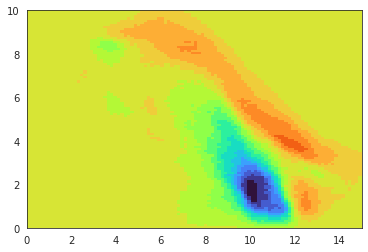

In [22]:
#this is the plot

plt.pcolormesh(X,Y,diff_density,cmap=discretized_jet,vmin=-0.05,vmax=0.04)


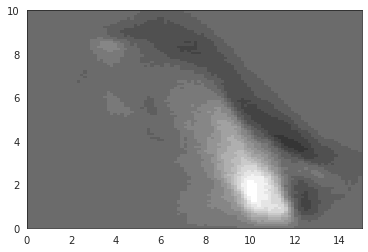

In [23]:
#this is the plot

plt.pcolormesh(X,Y,diff_density,cmap=discretized_mono,vmin=-0.05,vmax=0.04)


### Comparing across models ###

In [24]:
#poly (with already trained pca components)
smoothed_data_poly_f_23 = uniform_filter1d(polynomial_data[:,:],size=80,axis=0)
smoothed_data_poly_f_20 = uniform_filter1d(polynomial_data_f_20[:,:],size=80,axis=0)

pca_data_poly_20 = pca_smooth.transform(smoothed_data_poly_f_20)
pca_data_poly_23 = pca_smooth.transform(smoothed_data_poly_f_23)


dim1_poly_20 = (pca_data_poly_20[:,0]**2 + pca_data_poly_20[:,1]**2)**0.5
dim2_poly_20 = (pca_data_poly_20[:,2]**2 + pca_data_poly_20[:,3]**2)**0.5

dim1_poly_23 = (pca_data_poly_23[:,0]**2 + pca_data_poly_23[:,1]**2)**0.5
dim2_poly_23 = (pca_data_poly_23[:,2]**2 + pca_data_poly_23[:,3]**2)**0.5

In [25]:
density_23_poly,xedges,yedges,d = plt.hist2d(x=dim1_poly_23,y=dim2_poly_23,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
density_20_poly,xedges,yedges,d = plt.hist2d(x=dim1_poly_20,y=dim2_poly_20,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [26]:
diff_density_poly = density_23_poly.T - density_20_poly.T

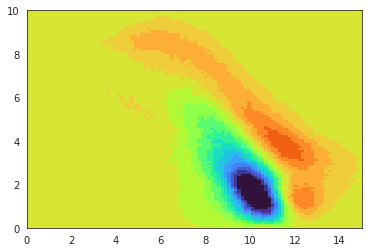

In [27]:

plt.pcolormesh(X,Y,diff_density_poly,cmap=discretized_jet,vmin=-0.05,vmax=0.04)


In [28]:
#rnn
smoothed_data_rnn = uniform_filter1d(rnn_full_f_20[:,:],size=80,axis=0)
smoothed_data_rnn_f_23 = uniform_filter1d(rnn_full_23[:,:],size=80,axis=0)

pca_data_smooth_rnn = pca_smooth.transform(smoothed_data_rnn)
pca_data_smooth_rnn_23 = pca_smooth.transform(smoothed_data_rnn_f_23)

dim1_rnn = (pca_data_smooth_rnn[:,0]**2 + pca_data_smooth_rnn[:,1]**2)**0.5
dim2_rnn = (pca_data_smooth_rnn[:,2]**2 + pca_data_smooth_rnn[:,3]**2)**0.5

dim1_rnn_23 = (pca_data_smooth_rnn_23[:,0]**2 + pca_data_smooth_rnn_23[:,1]**2)**0.5
dim2_rnn_23 = (pca_data_smooth_rnn_23[:,2]**2 + pca_data_smooth_rnn_23[:,3]**2)**0.5

In [29]:
density_23_rnn,xedges,yedges,d = plt.hist2d(x=dim1_rnn_23,y=dim2_rnn_23,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
density_20_rnn,xedges,yedges,d = plt.hist2d(x=dim1_rnn,y=dim2_rnn,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [30]:
diff_density_rnn = density_23_rnn.T - density_20_rnn.T

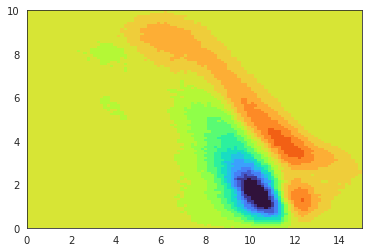

In [31]:
#this is the plot

plt.pcolormesh(X,Y,diff_density_rnn,cmap=discretized_jet,vmin=-0.05,vmax=0.04)


In [32]:
#gan (with already trained pca components)

smoothed_data_gan_f_23 = uniform_filter1d(gan_full_f_23[:,:],size=80,axis=0)
smoothed_data_gan_f_20 = uniform_filter1d(gan_full_f_20[:,:],size=80,axis=0)

pca_data_gan_20 = pca_smooth.transform(smoothed_data_gan_f_20)
pca_data_gan_23 = pca_smooth.transform(smoothed_data_gan_f_23)


dim1_gan_20 = (pca_data_gan_20[:,0]**2 + pca_data_gan_20[:,1]**2)**0.5
dim2_gan_20 = (pca_data_gan_20[:,2]**2 + pca_data_gan_20[:,3]**2)**0.5

dim1_gan_23 = (pca_data_gan_23[:,0]**2 + pca_data_gan_23[:,1]**2)**0.5
dim2_gan_23 = (pca_data_gan_23[:,2]**2 + pca_data_gan_23[:,3]**2)**0.5

In [33]:
density_23_gan,xedges,yedges,d = plt.hist2d(x=dim1_gan_23,y=dim2_gan_23,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
density_20_gan,xedges,yedges,d = plt.hist2d(x=dim1_gan_20,y=dim2_gan_20,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [34]:
diff_density_gan = density_23_gan.T - density_20_gan.T

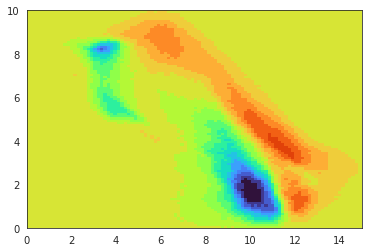

In [35]:
#this is the plot

plt.pcolormesh(X,Y,diff_density_gan,cmap=discretized_jet,vmin=-0.05,vmax=0.04)


In [36]:
density_gan_kl = density_23_gan+ 1e-10
density_rnn_kl = density_23_rnn+ 1e-10
density_true_kl = density+ 1e-10
density_poly_kl = density_23_poly + 1e-10

In [37]:
#kl between poly and true
np.sum(np.log(density_true_kl/density_poly_kl)*density_true_kl)


1.2700739434894774

In [38]:
#kl between rnn and true
np.sum(np.log(density_true_kl/density_rnn_kl)*density_true_kl)


0.9627420511449004

In [39]:
#kl between gan and true
np.sum(np.log(density_true_kl/density_gan_kl)*density_true_kl)


2.50165835280056

In [40]:
import matplotlib as mpl


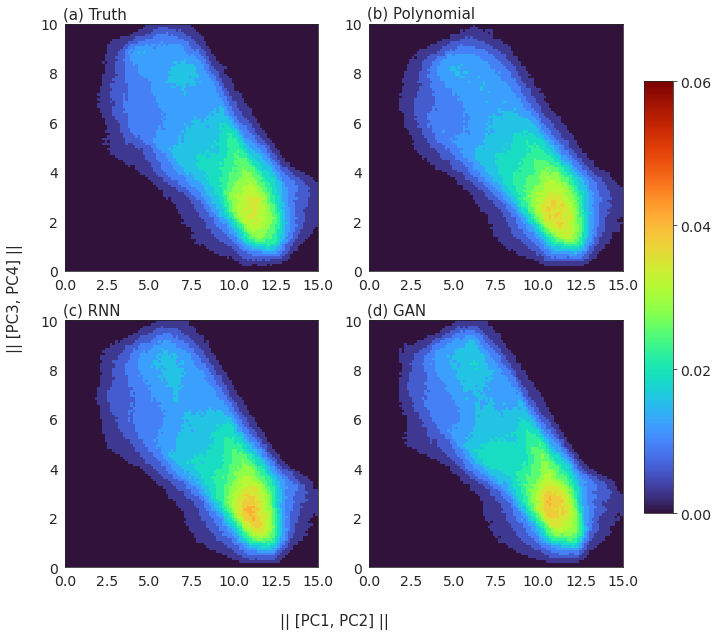

In [59]:
#recreating fig 7b / 8a
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

plt.rcParams['font.size'] = '14'

ax[0,0].hist2d(x=dim1,y=dim2,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[0,0].text(-0.1,10.7,"(a) Truth",fontsize=15,va="top")

ax[0,1].hist2d(x=dim1_poly_23,y=dim2_poly_23,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[0,1].text(-0.1,10.7,"(b) Polynomial",fontsize=15,va="top")


ax[1,0].hist2d(x=dim1_rnn_23,y=dim2_rnn_23,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[1,0].text(-0.1,10.7,"(c) RNN",fontsize=15,va="top")


ax[1,1].hist2d(x=dim1_gan_23,y=dim2_gan_23,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[1,1].text(-0.1,10.7,"(d) GAN",fontsize=15,va="top")



norm = mpl.colors.Normalize(vmin=0,vmax=0.06)
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.93,0.2,0.04,0.6])
fig.colorbar(sm, ticks=[0,0.02,0.04,0.06,0.08],cax=cax)

fig.text(0.5, 0.045, '|| [PC1, PC2] ||', ha='center', fontsize="15")
fig.text(0.045, 0.5, '|| [PC3, PC4] ||', va='center', rotation='vertical',fontsize="15")

plt.savefig("regime_plots_clim_change.pdf",bbox_inches="tight")


plt.show()

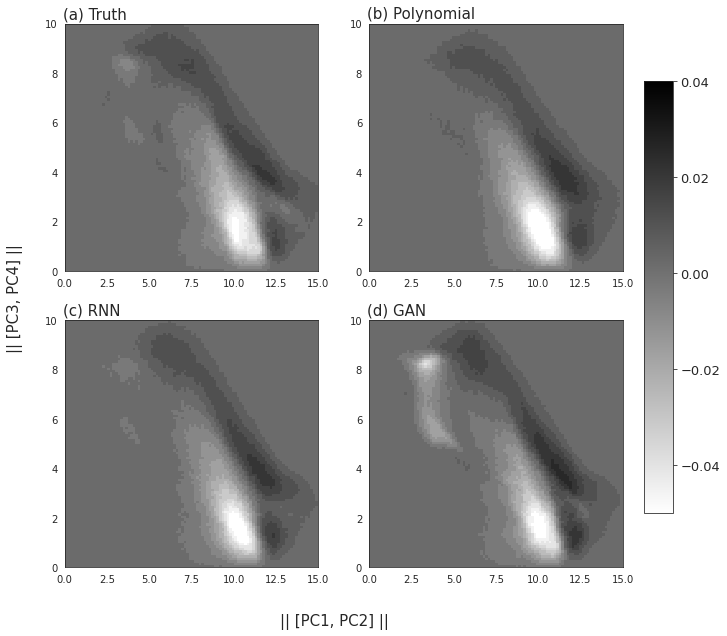

In [41]:
#recreating fig 7b / 8a
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)
plt.rcParams['font.size'] = '13'

ax[0,0].pcolormesh(X,Y,diff_density,cmap=discretized_mono,vmin=-0.05,vmax=0.04)
ax[0,0].text(-0.1,10.7,"(a) Truth",fontsize=15,va="top")

ax[0,1].pcolormesh(X,Y,diff_density_poly,cmap=discretized_mono,vmin=-0.05,vmax=0.04)
ax[0,1].text(-0.1,10.7,"(b) Polynomial",fontsize=15,va="top")

ax[1,0].pcolormesh(X,Y,diff_density_rnn,cmap=discretized_mono,vmin=-0.05,vmax=0.04)
ax[1,0].text(-0.1,10.7,"(c) RNN",fontsize=15,va="top")

ax[1,1].pcolormesh(X,Y,diff_density_gan,cmap=discretized_mono,vmin=-0.05,vmax=0.04)
ax[1,1].text(-0.1,10.7,"(d) GAN",fontsize=15,va="top")

norm = mpl.colors.Normalize(vmin=-0.05,vmax=0.04)
sm = plt.cm.ScalarMappable(cmap="binary", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.93,0.2,0.04,0.6])
fig.colorbar(sm, ticks=[-0.04,-0.02,0,0.02,0.04],cax=cax)

fig.text(0.5, 0.045, '|| [PC1, PC2] ||', ha='center', fontsize="15")
fig.text(0.045, 0.5, '|| [PC3, PC4] ||', va='center', rotation='vertical',fontsize="15")

#plt.savefig("clim_change_regime_change_plots.pdf",bbox_inches="tight")


plt.show()

In [45]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=4,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

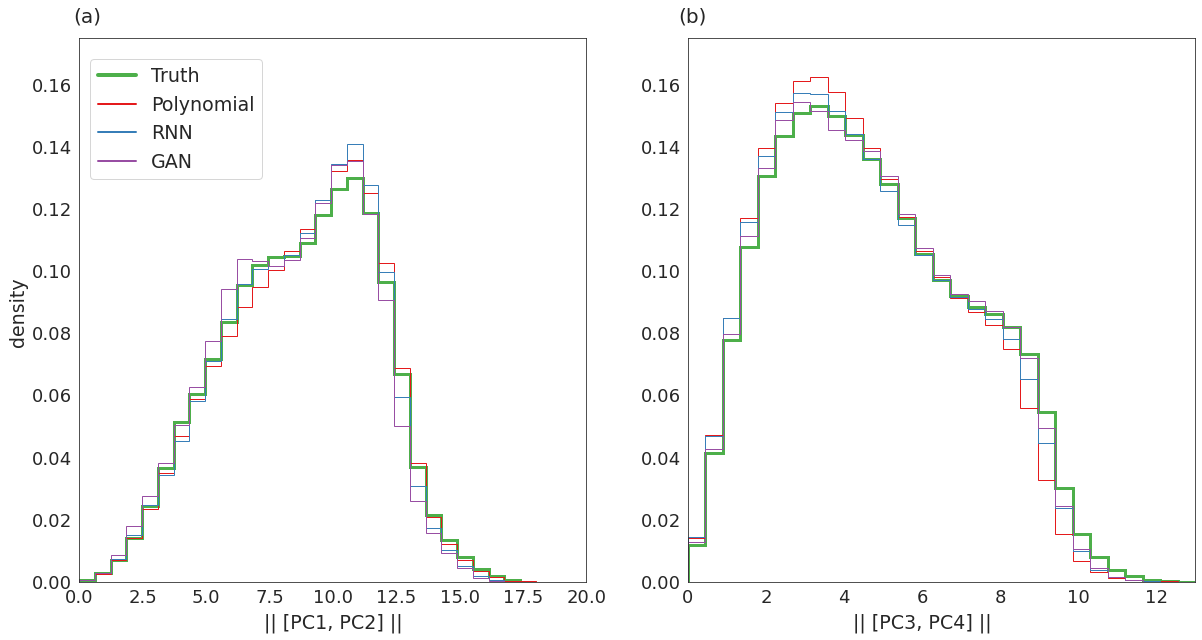

In [46]:
#joint figure of two regimes

bin_seq = np.linspace(0,18,30)
bin_seq2 = np.linspace(0,13,30)

plt.rcParams['font.size'] = '18'

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

ax[0].hist(np.ravel(dim1),bins=bin_seq,color="#4daf4a",density=True,histtype="step",linewidth=3)
ax[0].hist(np.ravel(dim1_poly_23[:]),bins=bin_seq,color="#e41a1c",density=True,histtype="step")
ax[0].hist(np.ravel(dim1_rnn_23[:]),bins=bin_seq,color="#377eb8",density=True,histtype="step")
ax[0].hist(np.ravel(dim1_gan_23[:]),bins=bin_seq,color="#984ea3",density=True,histtype="step")

ax[1].hist(np.ravel(dim2[:]),bins=bin_seq2,color="#4daf4a",density=True,histtype="step",linewidth=3)
ax[1].hist(np.ravel(dim2_poly_23[:]),bins=bin_seq2,color="#e41a1c",density=True,histtype="step")
ax[1].hist(np.ravel(dim2_rnn_23[:]),bins=bin_seq2,color="#377eb8",density=True,histtype="step")
ax[1].hist(np.ravel(dim2_gan_23[:]),bins=bin_seq2,color="#984ea3",density=True,histtype="step")



ax[0].text(10, -0.015, '|| [PC1, PC2] ||', ha='center', fontsize="19")
ax[1].text(6, -0.015, '|| [PC3, PC4] ||', ha='center', fontsize="19")

ax[0].text(-0.249,0.185,"(a)",fontsize=20,va="top")
ax[1].text(-0.249,0.185,"(b)",fontsize=20,va="top")

fig.legend(handles=legend_elements,loc=(0.075,0.72),prop={"size":19})

fig.text(0.076, 0.5, 'density', va='center', rotation='vertical',fontsize="19")

ax[0].set_xlim([0,20])
ax[0].set_ylim([0,0.175])

ax[1].set_xlim([0,13])
ax[1].set_ylim([0,0.175])



plt.savefig("clim_change_regime_hists.pdf",bbox_inches="tight")


plt.show()

In [47]:
fig,ax = plt.subplots()
bin_seq = np.linspace(0,18,30)

y_true,_,_ = ax.hist(np.ravel(dim1),bins=bin_seq,color="grey",density=True,histtype="step")
y_poly,_,_ = ax.hist(np.ravel(dim1_poly_23),bins=bin_seq,color="red",density=True,histtype="step")
y_rnn,_,_ = ax.hist(np.ravel(dim1_rnn_23),bins=bin_seq,color="blue",density=True,histtype="step")
y_gan,_,_ = ax.hist(np.ravel(dim1_gan_23),bins=bin_seq,color="purple",density=True,histtype="step")
plt.close()


In [48]:
#deal with numerical stuff due to y_true containing zero
y_true = y_true + 1e-10
y_rnn = y_rnn + 1e-10
y_poly = y_poly + 1e-10
y_gan = y_gan + 1e-10



In [49]:
#kl between poly and true
np.sum(np.log(y_true/y_poly)*y_true)


0.0022356236117819814

In [50]:
#kl between rnn and true
np.sum(np.log(y_true/y_rnn)*y_true)


0.006883863534298992

In [51]:
#kl between gan and true
np.sum(np.log(y_true/y_gan)*y_true)



0.016556090993222333

In [52]:
fig,ax = plt.subplots()
bin_seq2 = np.linspace(0,13,30)


y_true2,_,_ = ax.hist(np.ravel(dim2),bins=bin_seq2,color="grey",density=True,histtype="step")
y_poly2,_,_ = ax.hist(np.ravel(dim2_poly_23),bins=bin_seq2,color="red",density=True,histtype="step")
y_rnn2,_,_ = ax.hist(np.ravel(dim2_rnn_23),bins=bin_seq2,color="blue",density=True,histtype="step")
y_gan2,_,_ = ax.hist(np.ravel(dim2_gan_23),bins=bin_seq2,color="blue",density=True,histtype="step")

plt.close()

In [53]:
#deal with numerical stuff due to y_true containing zero
y_true2 = y_true2 + 1e-10
y_rnn2 = y_rnn2 + 1e-10
y_poly2 = y_poly2 + 1e-10
y_gan2= y_gan2 + 1e-10

In [54]:
#kl between poly and true
np.sum(np.log(y_true2/y_poly2)*y_true2)


0.026219551285981538

In [55]:
#kl between rnn and true
np.sum(np.log(y_true2/y_rnn2)*y_true2)


0.009255771702692605

In [56]:
#kl between gan and true
np.sum(np.log(y_true2/y_gan2)*y_true2)


0.007243942520382685